In [1]:
# Gerekli Kütüphanelerin Yüklenmesi

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from collections import Counter
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('D:/softwareDev/hangiKrediData/hiringChallenge/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
url = "D:/softwareDev/hangiKrediData/hiringChallenge/term-deposit-marketing.csv"
from sklearn import preprocessing
#from sklearn.processing import skimage, MinMaxScaler, StandartScaler

D:/softwareDev/hangiKrediData/hiringChallenge/hangiKrediDataChallenge.ipynb
D:/softwareDev/hangiKrediData/hiringChallenge/term-deposit-marketing.csv
D:/softwareDev/hangiKrediData/hiringChallenge/.ipynb_checkpoints\hangiKrediDataChallenge-checkpoint.ipynb
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\.gitattributes
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\hangiKrediDataChallenge.ipynb
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\LICENSE
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\README.md
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\term-deposit-marketing.csv
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\.git\COMMIT_EDITMSG
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\.git\config
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\.git\description
D:/softwareDev/hangiKrediData/hiringChallenge/gur8EBJ2IOxFgjtW\.git\FETCH_HEAD
D:/softwareDev/hangiKre

In [2]:
data = pd.read_csv(url)

In [3]:
data =data.drop(['duration'],axis=1)
print(data.shape)
data.head()

(40000, 13)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,no


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  campaign   40000 non-null  int64 
 12  y          40000 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.0+ MB


In [5]:
#dataframe'de bulunan numerik özet ifadelerin yer aldığı tablo

data.describe()

,age,balance,day,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,2.882175
std,9.641776,2903.769716,8.278127,3.239051
min,19.000000,-8019.000000,1.000000,1.000000
25%,33.000000,54.000000,8.000000,1.000000
50%,39.000000,407.000000,17.000000,2.000000
75%,48.000000,1319.000000,21.000000,3.000000
max,95.000000,102127.000000,31.000000,63.000000


In [6]:
data["job"].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [7]:
data["marital"].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [8]:
data["age"].unique()

array([58, 44, 33, 47, 35, 28, 42, 43, 41, 29, 53, 57, 51, 45, 60, 56, 32,
       25, 40, 39, 52, 46, 36, 49, 59, 37, 50, 54, 55, 48, 24, 38, 31, 30,
       27, 34, 23, 26, 61, 22, 21, 20, 66, 62, 83, 75, 67, 70, 65, 68, 64,
       69, 72, 71, 19, 76, 85, 63, 90, 82, 73, 74, 78, 80, 94, 79, 77, 86,
       95, 81], dtype=int64)

In [9]:
data["education"].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [10]:
data["default"].unique()

array(['no', 'yes'], dtype=object)

In [11]:
data["balance"].unique()

array([  2143,     29,      2, ...,   7222,   3402, 102127], dtype=int64)

In [12]:
data["housing"].unique()

array(['yes', 'no'], dtype=object)

In [13]:
data["loan"].unique()

array(['no', 'yes'], dtype=object)

In [14]:
data["contact"].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [15]:
# Ayın günlerini oluşturuyor

data["day"].unique()

array([ 5,  6,  7,  8,  9, 12, 13, 14, 15, 16, 19, 20, 21, 23, 26, 27, 28,
       29, 30,  2,  3,  4, 11, 17, 18, 24, 25,  1, 10, 22, 31],
      dtype=int64)

In [16]:
data["month"].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr'], dtype=object)

In [17]:
data["campaign"].unique()

array([ 1,  2,  3,  5,  4,  6,  7,  8,  9, 10, 11, 12, 13, 19, 14, 24, 16,
       32, 18, 22, 15, 17, 25, 21, 43, 51, 63, 41, 26, 28, 55, 50, 38, 23,
       20, 29, 31, 37, 30, 46, 27, 58, 33, 35, 34, 36, 39, 44],
      dtype=int64)

İlk önce kategorik değişkenlerin keşifsel analizine başlıyoruz ve kategorilerin neler olduğunu ve bu kategoriler için eksik değerler olup olmadığını görüyoruz. Burada, aşağıdaki çubuk grafikleri oluşturmak için seaborn paketini kullandık.

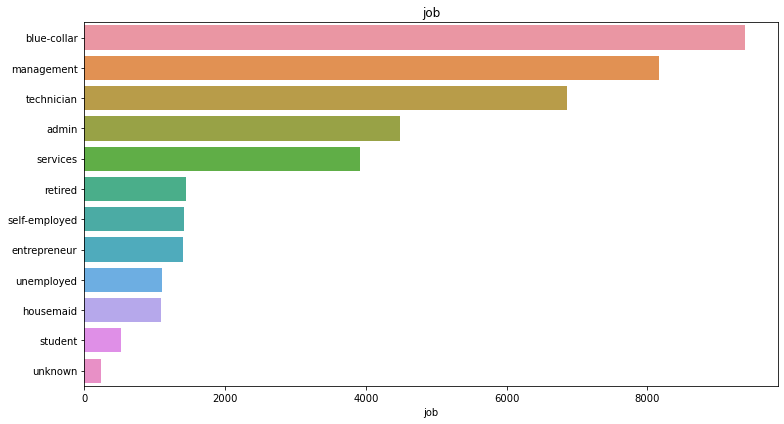

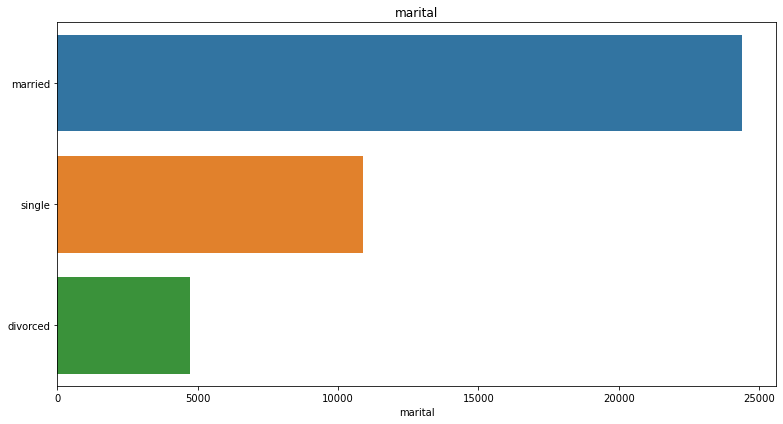

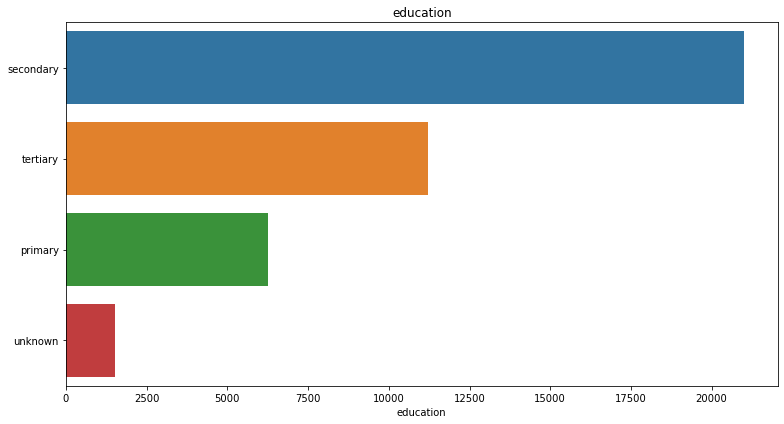

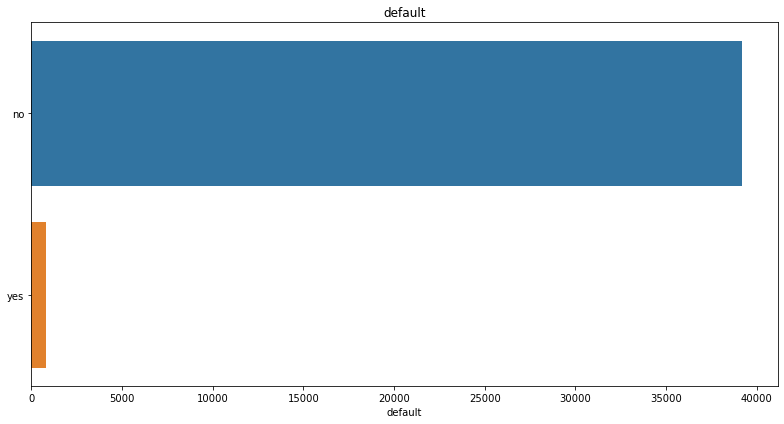

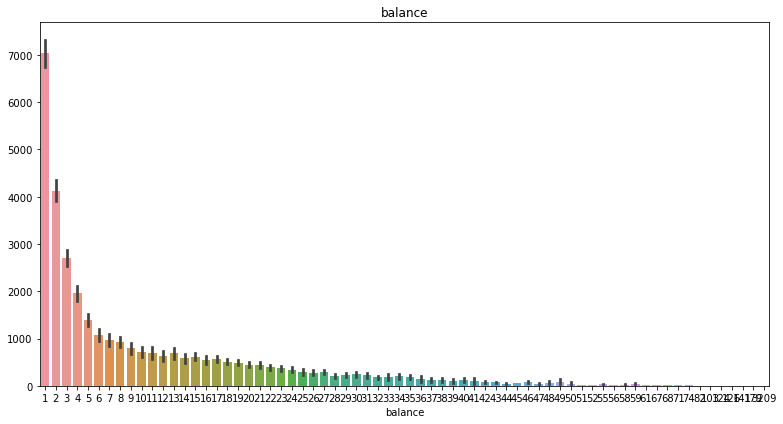

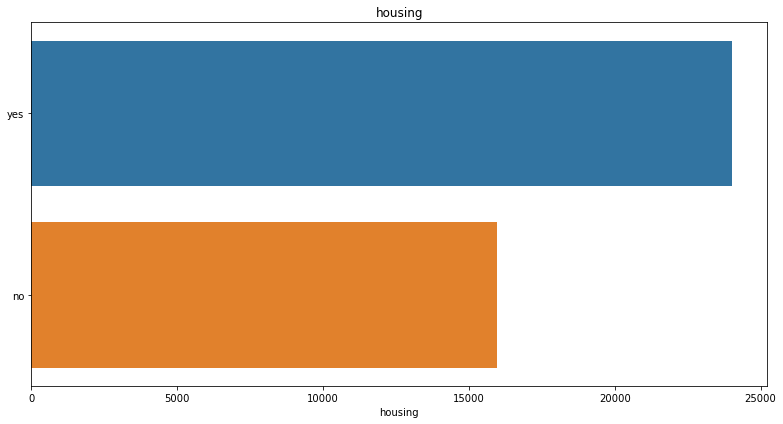

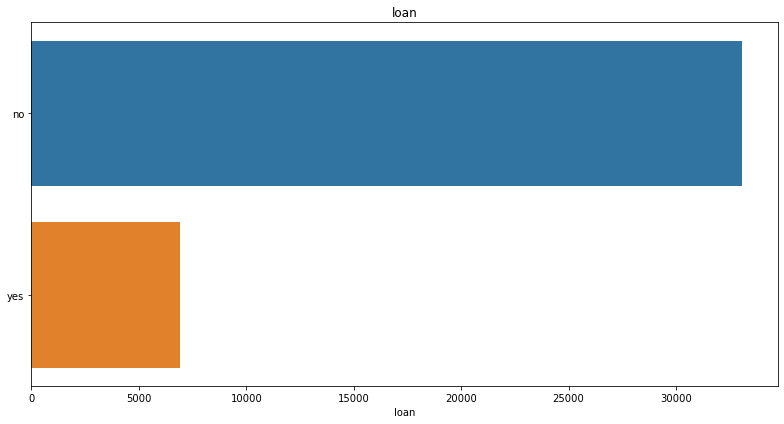

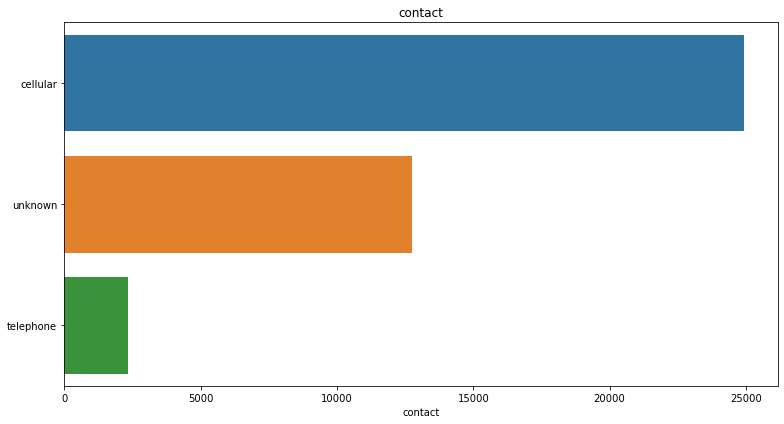

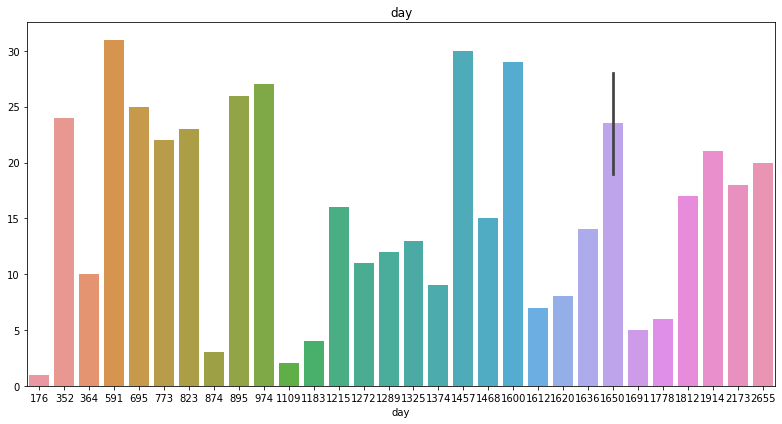

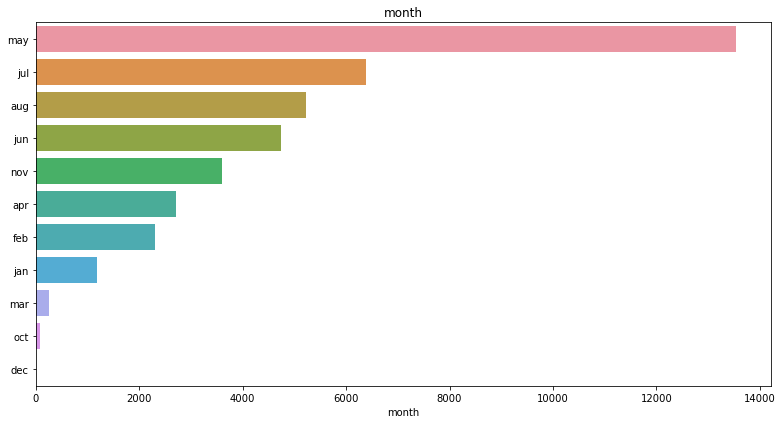

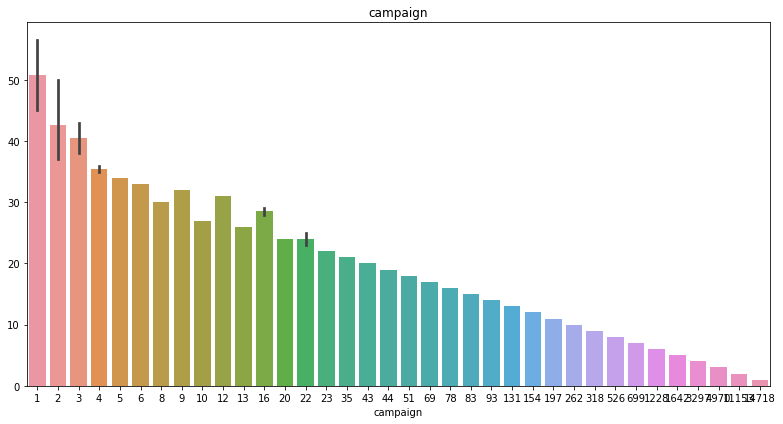

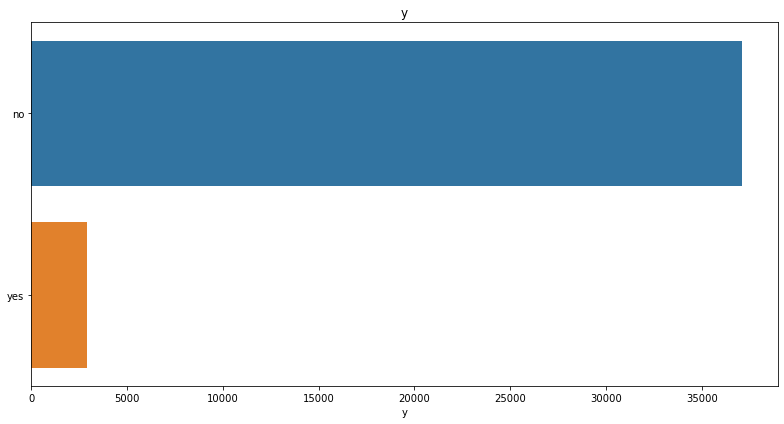

In [18]:
categori=['job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'campaign', 'y']
for col in categori:
    plt.figure(figsize=(11,6))
    sns.barplot(data[col].value_counts(),data[col].value_counts().index,data=data)
    plt.title(col)
    plt.tight_layout()

## Giriş Kategorik özellik Gözlem


1) Job - Müşterilerin yaptıkları işler.

2) Marital - Müşterinin evli olup olmaması ya da boşanmış olup olmamasını gösteren veri.

3) Education - İkincil okul okuyan müşterilerin yoğunlukta olduğunu göstermektedir.

4) Default - çoğu kişinin kredi taahhüt yoktur, bu da onların yaklaşabilecekleri anlamına gelir.

5) Housing - Hiç konut kredisi almamış kişilere daha fazla önem vermeliyiz.

6) Loan - İhtiyaç kredisi almamış kişilere daha fazla önem vermeliyiz.

7) Month - Yıl içerisinde en çok mevduat hesabı mayıs ayında açıldığını gösteriyor, demek oluyor ki müşteriler tatil planı yapabilirler.

8) Day - Bulundukları aylarda ay sonunda hesaplarında hareketlilik olduğunu gözlemleyebiliriz. 


### Hedef Değişkenlerle ilişkili değişkenleri kategorilere ayıralım

In [19]:
from scipy import stats

# öncelikle mesleklere göre hangi meslek grubunda olanların daha çok vadeli hesap açmış olabileceğini bulalım.


data.groupby(['job','y']).y.count()

job            y  
admin          no     4132
               yes     351
blue-collar    no     8848
               yes     535
entrepreneur   no     1317
               yes      88
housemaid      no     1034
               yes      53
management     no     7490
               yes     676
retired        no     1286
               yes     151
self-employed  no     1302
               yes     112
services       no     3672
               yes     238
student        no      442
               yes      82
technician     no     6355
               yes     497
unemployed     no     1008
               yes      96
unknown        no      218
               yes      17
Name: y, dtype: int64

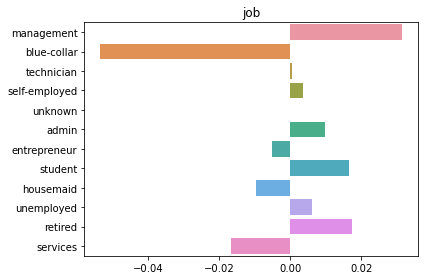

In [20]:
# burada yaptığımız müşterinin işi ile hesap açıp açmadığı arasındaki bağlantıyı
# diğer değişkenler yardımıyla hesaplatmak olacaktır.

# karşılaştırma yaptığımız müşterinin yapığı işe göre görselleştirmek
feature_name = 'job'


pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts()
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()

all_counts = list(set(list(pos_counts.index)+list(neg_counts.index)))

# ne kadar aralıkla tekrar ettiğini bulalım
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()

pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()

all_index = list(all_counts)
all_counts = [
    pos_counts.get(k, 0)/freq_pos - neg_counts.get(k, 0)/freq_neg
    for k in all_counts
]


sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

- Pozitif değerler, bu kategorinin abone olacak müşterileri desteklediğini ve negatif değerler kategorilerinin satın almamayı tercih ettiğini ima eder.

- Yöneticilerin hesap açmaya daha yatkın olduklarını görebiliriz.

In [21]:
data.groupby(['marital','y']).y.count()

marital   y  
divorced  no      4334
          yes      391
married   no     22908
          yes     1478
single    no      9862
          yes     1027
Name: y, dtype: int64

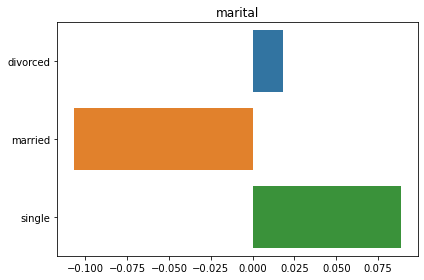

In [22]:
feature_name = 'marital'


pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts()
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()

all_counts = list(set(list(pos_counts.index)+list(neg_counts.index)))

freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()

pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()

all_index = list(all_counts)
all_counts = [
    pos_counts.get(k, 0)/freq_pos - neg_counts.get(k, 0)/freq_neg
    for k in all_counts
]


sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

In [23]:
data.groupby(['job','marital','y']).y.count()
# Ve Yönetici - evli insanlar Vadeli Mevduat ile daha fazla ilgileniyor.

job      marital   y  
admin    divorced  no      618
                   yes      62
         married   no     2178
                   yes     155
         single    no     1336
                          ... 
unknown  divorced  yes       1
         married   no      154
                   yes      11
         single    no       50
                   yes       5
Name: y, Length: 71, dtype: int64

In [24]:
data.groupby(['contact','y']).y.count()

contact    y  
cellular   no     22681
           yes     2233
telephone  no      2155
           yes      166
unknown    no     12268
           yes      497
Name: y, dtype: int64

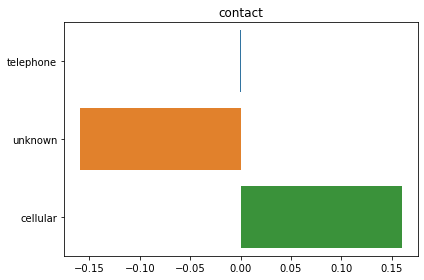

In [25]:
feature_name = 'contact'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

In [26]:
data.groupby(['day','y']).age.count()

day  y  
1    no      136
     yes      40
2    no     1005
     yes     104
3    no      794
            ... 
29   yes      49
30   no     1233
     yes     224
31   no      565
     yes      26
Name: age, Length: 62, dtype: int64

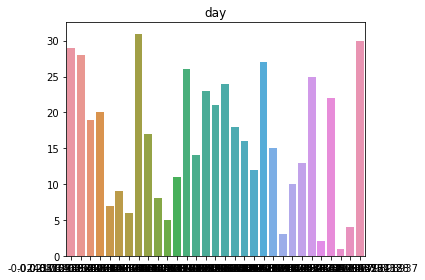

In [27]:
feature_name = 'day'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

In [28]:
data.groupby(['loan','y']).age.count()

loan  y  
no    no     30554
      yes     2516
yes   no      6550
      yes      380
Name: age, dtype: int64

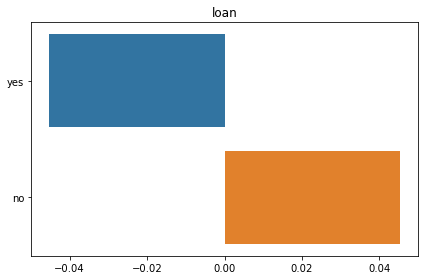

In [29]:
feature_name = 'loan'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

In [30]:
data.groupby(['default','y']).age.count()

default  y  
no       no     36344
         yes     2847
yes      no       760
         yes       49
Name: age, dtype: int64

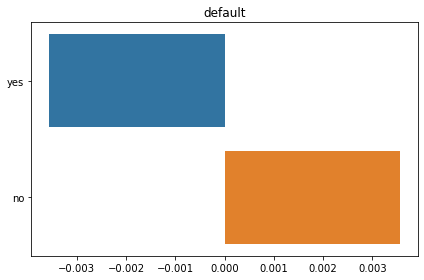

In [31]:
feature_name = 'default'


pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

In [32]:
data.groupby(['housing','y']).age.count()

housing  y  
no       no     14537
         yes     1432
yes      no     22567
         yes     1464
Name: age, dtype: int64

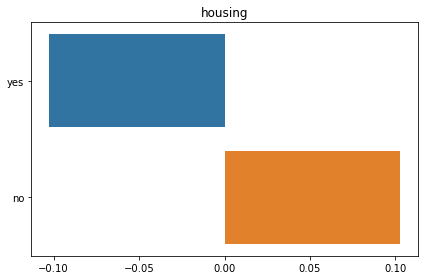

In [33]:
feature_name = 'housing'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

In [34]:
data.groupby(['month','y']).age.count()

month  y  
apr    no      2267
       yes      451
aug    no      4927
       yes      288
dec    no        12
       yes        1
feb    no      2041
       yes      255
jan    no      1138
       yes       38
jul    no      5996
       yes      384
jun    no      4440
       yes      294
mar    no       133
       yes      125
may    no     12741
       yes      791
nov    no      3378
       yes      220
oct    no        31
       yes       49
Name: age, dtype: int64

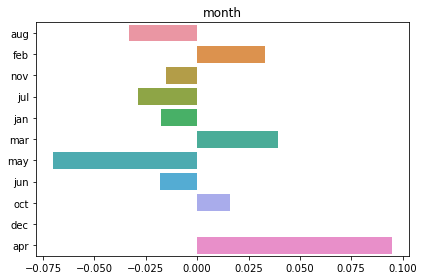

In [35]:
feature_name = 'month'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

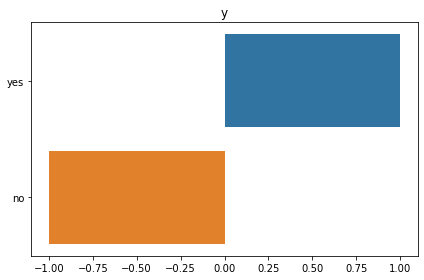

In [36]:
feature_name = 'y'

# ======================================================================================================

pos_counts = data.loc[data.y.values == 'yes', feature_name].value_counts() 
neg_counts = data.loc[data.y.values == 'no', feature_name].value_counts()
    
all_counts = list(set(list(pos_counts.index) + list(neg_counts.index)))
    
#Counts of how often each outcome was recorded.
freq_pos = (data.y.values == 'yes').sum()
freq_neg = (data.y.values == 'no').sum()
    
pos_counts = pos_counts.to_dict()
neg_counts = neg_counts.to_dict()
    
all_index = list(all_counts)
all_counts = [pos_counts.get(k, 0) / freq_pos - neg_counts.get(k, 0) / freq_neg for k in all_counts]

sns.barplot(all_counts, all_index)
plt.title(feature_name)
plt.tight_layout()

1) Veri kümesinde birçok değişken için bilinmeyen değerler var. Eksik verileri işlemenin birçok yolu vardır. Yollardan biri satırı atmaktır, ancak bu veri kümesinin azalmasına yol açacaktır ve bu nedenle doğru ve gerçekçi bir tahmin modeli oluşturma amacımıza hizmet etmeyecektir.

2) Diğer yöntem, bilinmeyen değişkenin değerini diğer değişkenlerden akıllıca çıkarmaktır. Bu, eksik değişkenin değerini çıkarmak için diğer bağımsız değişkenleri kullandığımız bir atama yapmanın bir yoludur. Bu, tüm eksik değerlerin ele alınacağını garanti etmez, ancak çoğunun tahminde faydalı olabilecek makul bir değeri olacaktır.

3) Değeri bilinmeyen/eksik olan değişkenler: 'Education', 'Job' ve 'Contact'. 'Default' değişken için bilinmeyen, bilinmeyen olarak kaydedildiği kabul edilir. Müşterinin bu bilgileri bankacılık temsilcisine açıklamak istememesi mümkün olabilir. Dolayısıyla 'Default'daki bilinmeyen değer aslında ayrı bir değerdir.

4) Bu nedenle 'Education', 'Job' ve 'Contact'da bilinmeyen değerler için yeni değişkenler oluşturarak başlıyoruz. Bunu değerlerin rastgele olup olmadığını veya eksik değerlerde bir kalıp olup olmadığını görmek için yapıyoruz.

## Çıkarım/Sonuç

In [37]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,no


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
y = data[['y']]
X = data.drop(['y'], axis=1)
#y = data['y'].values

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [41]:
X_test.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign'],
      dtype='object')

In [42]:
X_train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign'],
      dtype='object')

In [43]:
y_train.head()

,y
38015,no
2281,no
36629,no
6087,no
11792,no


In [44]:
y_test.head()

,y
32823,no
16298,no
28505,no
6689,no
26893,no


### Eğitim ve test verilerinin dağıtımı

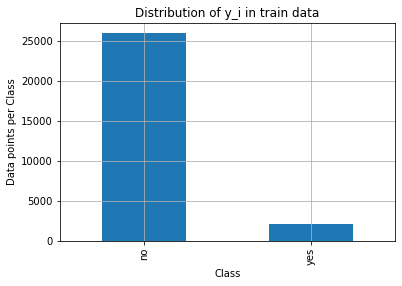

Number of data points in class 1 : 25976 ( 92.771 %)
Number of data points in class 2 : 2024 ( 7.229 %)
--------------------------------------------------------------------------------


In [45]:
def plot_distribution(class_distribution,title,xlabel,ylabel):
    class_distribution.plot(kind='bar')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid()
    plt.show()


# it returns a dict, keys as class labels and values as the number of data points in that class
train_class_distribution = y_train['y'].value_counts()
test_class_distribution = y_test['y'].value_counts()


plot_distribution(train_class_distribution,
                 'Distribution of y_i in train data',
                 'Class',
                 'Data points per Class')

#  ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(train_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-train_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], 
          '(', np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3), '%)')
    
print('-'*80)

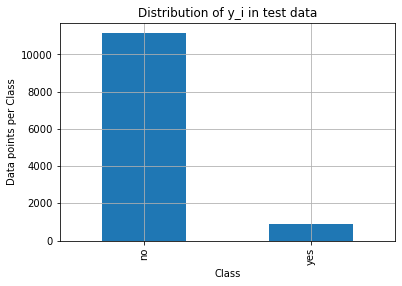

Number of data points in class 1 : 11128 ( 92.733 %)
Number of data points in class 2 : 872 ( 7.267 %)
--------------------------------------------------------------------------------


In [46]:
plot_distribution(test_class_distribution,
                 'Distribution of y_i in test data',
                 'Class',
                 'Data points per Class')

# ref: argsort https://docs.scipy.org/doc/numpy/reference/generated/numpy.argsort.html
# -(test_class_distribution.values): the minus sign will give us in decreasing order
sorted_yi = np.argsort(-test_class_distribution.values)
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], 
          '(', np.round((test_class_distribution.values[i]/X_test.shape[0]*100), 3), '%)')

print('-'*80)

In [47]:
data = pd.concat([X_train, y_train], axis=1)

In [48]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y
38015,30,entrepreneur,single,tertiary,no,303,yes,no,cellular,14,may,2,no
2281,34,entrepreneur,single,tertiary,no,714,yes,no,unknown,12,may,4,no
36629,24,blue-collar,married,secondary,no,1470,yes,no,cellular,12,may,1,no
6087,43,management,single,secondary,no,109,yes,no,unknown,27,may,3,no
11792,35,blue-collar,married,primary,no,14,yes,no,unknown,20,jun,1,no


In [49]:
data_1= pd.concat([X_test, y_test], axis=1)

In [50]:
data_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y
32823,48,management,divorced,tertiary,no,266,yes,no,cellular,17,apr,2,no
16298,53,retired,divorced,secondary,no,84,no,no,cellular,23,jul,1,no
28505,43,management,divorced,tertiary,no,3578,no,no,cellular,29,jan,2,no
6689,38,technician,married,secondary,no,133,yes,no,unknown,28,may,1,no
26893,42,management,married,tertiary,no,4014,yes,no,cellular,21,nov,4,no


## Atama

* Şimdi, 'Job' ve 'Education'daki eksik değerleri çıkarmak için, 'Job' ve 'Education' arasındaki çapraz tablodan yararlanıyoruz. Buradaki hipotezimiz, 'Job'in bir kişinin 'Education'dan etkilendiğidir. Dolayısıyla, kişinin eğitimine dayanarak 'Job' çıkarabiliriz. Ayrıca, sadece eksik değerleri doldurduğumuz için nedensel çıkarımla fazla ilgilenmiyoruz. Bu nedenle, işi eğitimi tahmin etmek için kullanabiliriz.

In [51]:
def cross_tab(data,f1,f2):
    # find no of unique values in jobs colums
    jobs=list(data[f1].unique())
    # find no of unique values in education columns
    edu=list(data[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=data[data[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [52]:
cross_tab(data,'job','education')

,tertiary,secondary,primary,unknown
job,,,,
admin,279,2636,133,97
blue-collar,85,3578,2532,311
entrepreneur,444,349,116,57
housemaid,102,258,391,29
management,4726,721,193,135
retired,172,464,357,45
self-employed,491,384,88,22
services,117,2303,245,99
student,98,196,17,53


- İşlerden eğitim çıkarımı : Çapraz tablodan, yöneticilik işlerine sahip kişilerin genellikle üniversite diplomasına sahip oldukları görülebilir. Dolayısıyla 'iş' = yönetim ve 'eğitim' = bilinmeyen olduğunda, 'eğitim' yerine 'tertiary' koyabiliriz. Benzer şekilde, 'iş' = 'hizmetler' --> 'eğitim' = 'secondary' ve 'iş' = 'hizmetçi' --> 'eğitim' = 'primary'.

* Eğitimden meslek çıkarımı : Eğer 'eğitim' = 'secondary' veya 'primary' ise 'iş' genellikle 'mavi yakalı' olur. 'Eğitim' = 'tertiary' ise, 'iş' = 'management'.

- İş ve eğitim için değerleri yüklerken, korelasyonların gerçek dünyayı anlamlı hale getirmesi gerektiğinin farkındaydık. Gerçek dünyaya anlam ifade etmiyorsa, eksik değerleri değiştirmedik.

In [53]:
data['job'][data['age']>60].value_counts()

retired          109
management        13
housemaid         12
technician         7
blue-collar        7
self-employed      4
admin              3
unknown            3
Name: job, dtype: int64

Yaştan çıkarsama işleri: Gördüğümüz gibi, eğer 'yaş' > 60 ise, o zaman 'iş' 'emekli'dir, bu mantıklıdır.

In [54]:
data.loc[(data['age']>60) & (data['job']=='unknown'), 'job'] = 'retired'
data.loc[(data['education']=='unknown') & (data['job']=='admin'), 'education'] = 'secondary'
data.loc[(data['education']=='unknown') & (data['job']=='blue-collar'), 'education'] = 'primary'
data.loc[(data['education']=='unknown') & (data['job']=='entrepreneur'), 'education'] = 'tertiary'
data.loc[(data['education']=='unknown') & (data['job']=='housemaid'), 'education'] = 'primary'
data.loc[(data['education']=='unknown') & (data['job']=='management'), 'education'] = 'tertiary'
data.loc[(data['education']=='unknown') & (data['job']=='self-employed'), 'education'] = 'tertiary'
data.loc[(data['education']=='unknown') & (data['job']=='services'), 'education'] = 'secondary'
data.loc[(data['education']=='unknown') & (data['job']=='student'), 'education'] = 'primary'
data.loc[(data['education']=='unknown') & (data['job']=='technician'), 'education'] = 'secondary'
data.loc[(data['education']=='unknown') & (data['job']=='unemployed'), 'education'] = 'primary'
data.loc[(data['job'] == 'unknown') & (data['education']=='primary'), 'job'] = 'blue-collar'
data.loc[(data['job'] == 'unknown') & (data['education']=='secondary'), 'job'] = 'technician'
data.loc[(data['job'] == 'unknown') & (data['education']=='tertiary'), 'job'] = 'management'

In [55]:
cross_tab(data,'job','education')

,tertiary,secondary,primary,unknown
admin,279.0,2733.0,133.0,0.0
blue-collar,85.0,3578.0,2876.0,0.0
entrepreneur,501.0,349.0,116.0,0.0
housemaid,102.0,258.0,420.0,0.0
management,4881.0,721.0,193.0,0.0
retired,173.0,465.0,357.0,46.0
self-employed,513.0,384.0,88.0,0.0
services,117.0,2402.0,245.0,0.0
student,98.0,196.0,70.0,0.0
technician,1183.0,3504.0,109.0,0.0


Gördüğümüz gibi, bilinmeyenlerin sayısını azaltabiliyor ve veri setimizi geliştirebiliyoruz.

### Sayısal değişkenler
Sayısal değişkenleri anlamak için verilerin özetini görelim

In [56]:
numerical_variables = ['age','campaign', 'balance', 'day']
data[numerical_variables].describe()

,age,campaign,balance,day
count,28000.000000,28000.000000,28000.000000,28000.000000
mean,40.613321,2.884286,1280.673179,16.057500
std,9.680463,3.277912,2890.332386,8.262877
min,19.000000,1.000000,-6847.000000,1.000000
25%,33.000000,1.000000,55.000000,9.000000
50%,39.000000,2.000000,409.000000,17.000000
75%,48.000000,3.000000,1330.000000,21.000000
max,94.000000,58.000000,102127.000000,31.000000


Eksik Değerler: Veri kaynağından (U.C. Irvine ML Deposu), eksik değerlerin veya NaN'lerin '999' olarak kodlandığı söylendi. Yukarıdaki tabloda eksik verimizin olmadığı gözlemlenmektedir

In [87]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [88]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y
38015,1,entrepreneur,single,tertiary,0,303,1,0,cellular,14,may,2,no
2281,2,entrepreneur,single,tertiary,0,714,1,0,unknown,12,may,4,no
36629,1,blue-collar,married,secondary,0,1470,1,0,cellular,12,may,1,no
6087,3,management,single,secondary,0,109,1,0,unknown,27,may,3,no
11792,2,blue-collar,married,primary,0,14,1,0,unknown,20,jun,1,no


In [58]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'y'],
      dtype='object')

## Denge

<AxesSubplot:xlabel='y', ylabel='count'>

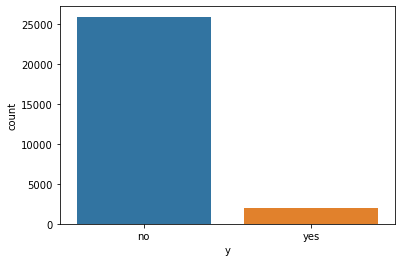

In [59]:
sns.countplot(x='y',data=data)

Verilerin çok çarpık olduğunu görebiliriz, bu yüzden 'evet'e karşılık gelen demetleri çoğaltıyoruz.

In [60]:
d1=data.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1

<AxesSubplot:xlabel='y', ylabel='count'>

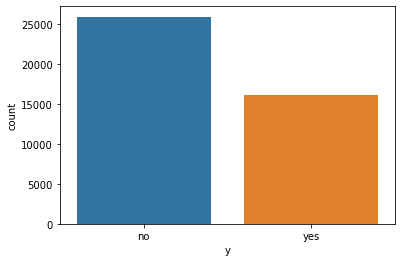

In [61]:
sns.countplot(x='y',data=data)

### Aykırı Değer Kontrol

Kullanılacak olan verisetlerinde herhangi bir şekilde ortalamaya kötü yönde etki edecek verinin tespitini yapmak.

https://www.kaggle.com/sbariskoksal/sbariskoksal-titanic-eda?scriptVersionId=52751424&cellId=21

#### Aykırı Değerler

* Outliers are defined as 1.5 x Q3 value (75th percentile).
* From the above table, it can be seen that only 'age' and 'campaign' have outliers as max('age') and max('campaign') > 1.5Q3('age') and >1.5Q3('campaign') respectively.

In [65]:
def detect_outliers(df,features):
    outlierIndices = []
    
    for c in features:
        # Q1
        Q1 = np.percentile(df[c],25)
        # Q3
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # outlier Step
        outlierStep = IQR * 1.5
        # detect outlier and their indices
        outlierListCol = df[(df[c] < Q1 - outlierStep) | (df[c] > Q3 + outlierStep )].index
        # store indeces
        outlierIndices.extend(outlierListCol)
        
    outlierIndices = Counter(outlierIndices)
    
    multipleOutliers = list(i for i, v in outlierIndices.items() if v > 2)
    
    return multipleOutliers

<AxesSubplot:>

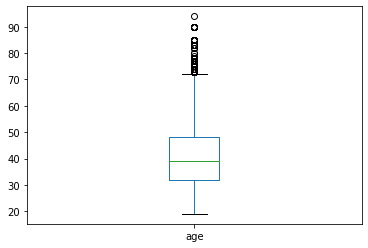

In [66]:
# Check outlier if any for Numberic column.
data.age.plot(kind='box')
# There are outlier and check max age and age greated than 90

In [67]:
print(data.age.max())
data[data['age'] > 80].head(5)

94


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y
31395,83,retired,divorced,primary,no,46,no,no,cellular,25,mar,1,yes
31089,82,retired,married,tertiary,no,278,no,no,cellular,16,feb,7,no
31233,94,retired,divorced,secondary,no,1234,no,no,cellular,3,mar,1,no
29158,83,retired,married,primary,no,425,no,no,telephone,2,feb,1,no
29322,83,retired,married,tertiary,no,6236,no,no,cellular,2,feb,2,no


<AxesSubplot:ylabel='Frequency'>

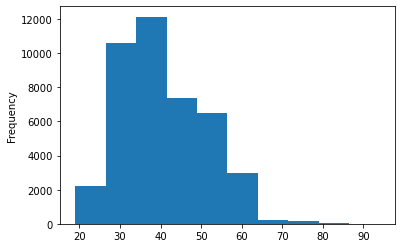

In [68]:
data.age.plot(kind='hist')
# it is bit positively skewed but it is ok and seems no high dependency with Output variable

<AxesSubplot:ylabel='Density'>

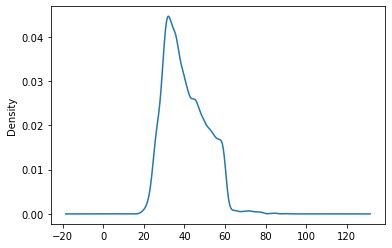

In [69]:
data.age.plot(kind='kde')

In [70]:
# Create Binning for all numeric fields base on Box plot quantile
def binning(dataframe,featureName):
    print (featureName)
    q1 = dataframe[featureName].quantile(0.25)
    q2 = dataframe[featureName].quantile(0.50)
    q3 = dataframe[featureName].quantile(0.75)
    dataframe.loc[(dataframe[featureName] <= q1), featureName] = 1
    dataframe.loc[(dataframe[featureName] > q1) & (dataframe[featureName] <= q2), featureName] = 2
    dataframe.loc[(dataframe[featureName] > q2) & (dataframe[featureName] <= q3), featureName] = 3
    dataframe.loc[(dataframe[featureName] > q3), featureName] = 4 
    print (q1, q2, q3)

In [71]:
binning(data,'age')

age
32.0 39.0 48.0


### Verileri Standartlaştırma

In [72]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'y'],
      dtype='object')

In [73]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y
38015,1,entrepreneur,single,tertiary,no,303,yes,no,cellular,14,may,2,no
2281,2,entrepreneur,single,tertiary,no,714,yes,no,unknown,12,may,4,no
36629,1,blue-collar,married,secondary,no,1470,yes,no,cellular,12,may,1,no
6087,3,management,single,secondary,no,109,yes,no,unknown,27,may,3,no
11792,2,blue-collar,married,primary,no,14,yes,no,unknown,20,jun,1,no


## Kategorik değişkenler Sıralı veya Numerik olabilir

In [74]:
data['default'] = data['default'].map({'yes': 1,'unknown': -1,'no': 0})
data['housing'] = data['housing'].map({'yes': 1,'unknown': -1,'no': 0})
data['loan'] = data['loan'].map({'yes': 1,'unknown': -1,'no': 0})

## Nominal Değişkenleri İşleme (One Hot Encoding)

'job', 'maritial', 'education', 'contact', 'month', 'day' are Nominal Variables

In [75]:
# One hot encoding of nominal varibles
nominal = ['job', 'marital','education','default','housing','loan','contact']
data_clean = pd.get_dummies(data,columns=nominal)
data_clean['y']=data_clean['y'].map({'yes': 1,'no': 0})
data_clean.head()

,age,balance,day,month,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,...,education_unknown,default_0,default_1,housing_0,housing_1,loan_0,loan_1,contact_cellular,contact_telephone,contact_unknown
38015,1,303,14,may,2,0,0,0,1,0,...,0,1,0,0,1,1,0,1,0,0
2281,2,714,12,may,4,0,0,0,1,0,...,0,1,0,0,1,1,0,0,0,1
36629,1,1470,12,may,1,0,0,1,0,0,...,0,1,0,0,1,1,0,1,0,0
6087,3,109,27,may,3,0,0,0,0,0,...,0,1,0,0,1,1,0,0,0,1
11792,2,14,20,jun,1,0,0,1,0,0,...,0,1,0,0,1,1,0,0,0,1


In [76]:
data_clean.columns

Index(['age', 'balance', 'day', 'month', 'campaign', 'y', 'job_admin',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_0', 'default_1', 'housing_0', 'housing_1',
       'loan_0', 'loan_1', 'contact_cellular', 'contact_telephone',
       'contact_unknown'],
      dtype='object')

In [77]:
data_clean.shape

(42168, 34)

In [78]:
df_with_dummies=pd.get_dummies(data_clean)

In [79]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

In [80]:
features_dropped = ['marital_single','contact_cellular',
                    'education_unknown','job_unknown',
     'marital_single','contact_cellular',
                    'education_unknown']
data_clean = dropfeature(df_with_dummies, features_dropped)

# Sayısal alanlar için grafikler çizerek veri dağılımını analiz etme

In [81]:
data_clean.describe()

,age,balance,day,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
count,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,...,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000,42168.000000
mean,2.440500,1377.916785,16.040007,2.724957,0.383988,0.114423,0.214997,0.033533,0.024972,0.216942,...,0.120897,0.000237,0.065998,0.024213,0.152794,0.111601,0.019565,0.312464,0.085634,0.007280
std,1.110948,2915.134052,8.377302,2.981250,0.486361,0.318328,0.410825,0.180025,0.156040,0.412168,...,0.326012,0.015398,0.248281,0.153711,0.359793,0.314879,0.138500,0.463504,0.279826,0.085015
min,1.000000,-6847.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,81.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,466.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,1469.250000,22.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,102127.000000,31.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
data_clean.head()

,age,balance,day,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
38015,1,303,14,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2281,2,714,12,4,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
36629,1,1470,12,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6087,3,109,27,3,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
11792,2,14,20,1,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [83]:
data_clean.shape

(42168, 40)

In [84]:
data_clean.corr()
# Input feature - nr.employed and  euribor3m (.94) and emp.var.rate and nr.employed (.90) 
#and euribor3m and emp.var.rate (.97) are more correlated and we can remove on column.
# And lets Remove columns - euribor3m and emp.var.rate

,age,balance,day,campaign,y,job_admin,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct
age,1.000000,0.064880,-0.014377,0.016039,-0.058839,-0.048176,-0.005590,0.032269,0.091953,-0.020545,...,0.089335,-0.003334,-0.016844,-0.021213,0.017494,0.084065,-0.017326,-0.113850,0.036339,0.006972
balance,0.064880,1.000000,0.005660,-0.013262,0.052050,-0.038484,-0.049167,0.015151,0.006363,0.080312,...,0.007516,-0.002547,0.005650,-0.035113,-0.083999,0.019342,0.040959,-0.054614,0.130738,0.045332
day,-0.014377,0.005660,1.000000,0.130379,-0.003258,-0.005558,-0.037601,-0.000292,0.007128,0.017082,...,0.016794,-0.011104,-0.274985,0.241100,0.152612,-0.238176,-0.035953,-0.047347,0.102072,0.082938
campaign,0.016039,-0.013262,0.130379,1.000000,-0.083390,-0.018815,-0.004656,0.008701,0.018945,0.021521,...,0.194548,-0.008911,-0.035101,-0.057764,0.117779,0.035731,-0.017523,-0.083770,-0.086785,-0.049551
y,-0.058839,0.052050,-0.003258,-0.083390,1.000000,0.010302,-0.070411,-0.008385,-0.028855,0.037772,...,-0.046301,-0.012160,0.058792,-0.053310,-0.036054,-0.038256,0.144771,-0.076946,-0.025542,0.097570
job_admin,-0.048176,-0.038484,-0.005558,-0.018815,0.010302,1.000000,-0.188116,-0.066955,-0.057525,-0.189199,...,-0.083941,-0.000698,0.001368,0.005900,0.011962,-0.007210,0.021839,0.038151,-0.015490,0.021796
job_blue-collar,-0.005590,-0.049167,-0.037601,-0.004656,-0.070411,-0.188116,1.000000,-0.097481,-0.083752,-0.275458,...,-0.097042,-0.000562,-0.057274,-0.025354,0.002531,0.024973,-0.060590,0.145490,-0.040506,-0.019015
job_entrepreneur,0.032269,0.015151,-0.000292,0.008701,-0.008385,-0.066955,-0.097481,1.000000,-0.029809,-0.098042,...,-0.047660,-0.002869,-0.000170,0.001511,0.029273,0.011378,-0.011094,-0.017856,0.054098,0.024336
job_housemaid,0.091953,0.006363,0.007128,0.018945,-0.028855,-0.057525,-0.083752,-0.029809,1.000000,-0.084234,...,0.027829,-0.002465,-0.016219,-0.009389,0.045244,0.055740,0.004827,-0.066243,-0.010413,0.000597
job_management,-0.020545,0.080312,0.017082,0.021521,0.037772,-0.189199,-0.275458,-0.098042,-0.084234,1.000000,...,0.113489,-0.000633,0.003766,-0.015159,-0.031465,-0.025752,0.051108,-0.082480,0.045776,0.006361


In [89]:
def drawheatmap(df):
    '''Builds the heat map for the given data'''
    f, ax = plt.subplots(figsize=(15, 15))
    sns.heatmap(df.corr(method='spearman'), annot=False, cmap='coolwarm')

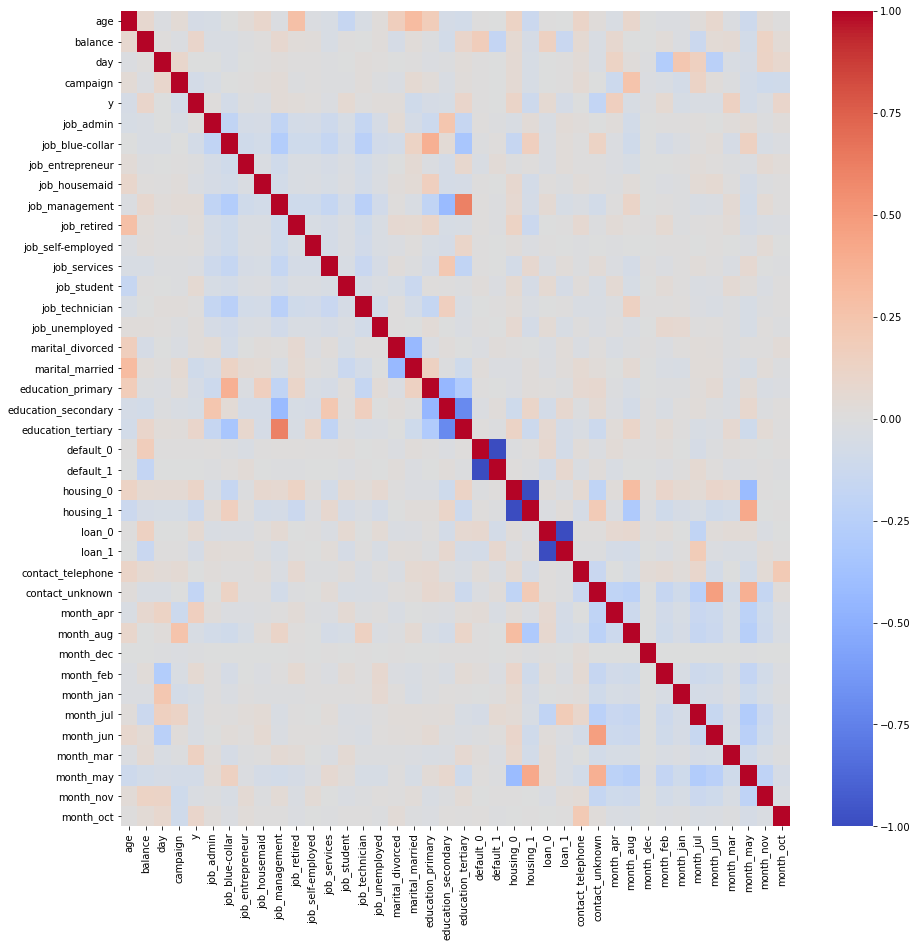

In [90]:
drawheatmap(data_clean)

## Çıkarımlar

* Yukarıdaki ısı haritasından 'y'nin (hedef değişkenimiz) eğitim verileri ile arasındaki ilişkiyi modelleri oluştururken bu bağımsız değişkenleri önemli görmeyi bekliyoruz.

## Test verilerini standartlaştırma

In [92]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [93]:
data_1= pd.concat([X_test, y_test], axis=1)

In [94]:
data_1.shape

(12000, 13)

In [98]:
data_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'y'],
      dtype='object')

Eğitim verilerinde gördüğümüz gibi, 'day' değerlerinin çoğu eksik. Bu eksik değerlerin çoğu, 'poutcome' 'yok' olduğunda ortaya çıkar. Bu, müşteriyle daha önce hiç iletişime geçilmediği için 'pdays' içindeki değerlerin çoğunun eksik olduğu anlamına gelir. Bu değişkenle başa çıkmak için 'pdays' sayısal değişkenini kaldırdık ve yerine şu kategorilere sahip kategorik değişkenler koyduk: 'pdays' ve 'pdays2'

# y Çıktısını Dengeleme

<AxesSubplot:xlabel='y', ylabel='count'>

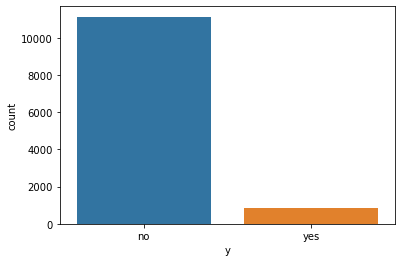

In [99]:
sns.countplot(x='y',data=data_1)

Verilerin çok çarpık olduğunu görebiliriz, bu yüzden 'evet'e karşılık gelen demetleri çoğaltıyoruz.

In [100]:
d1=data_1.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data_1=d1

<AxesSubplot:xlabel='y', ylabel='count'>

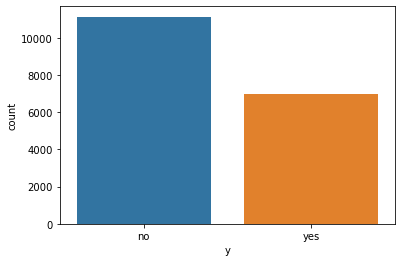

In [101]:
sns.countplot(x='y',data=data_1)

In [102]:
data_1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'campaign', 'y'],
      dtype='object')

In [103]:
data_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y
32823,48,management,divorced,tertiary,no,266,yes,no,cellular,17,apr,2,no
16298,53,retired,divorced,secondary,no,84,no,no,cellular,23,jul,1,no
28505,43,management,divorced,tertiary,no,3578,no,no,cellular,29,jan,2,no
6689,38,technician,married,secondary,no,133,yes,no,unknown,28,may,1,no
26893,42,management,married,tertiary,no,4014,yes,no,cellular,21,nov,4,no


# Kategorik değişkenler Sıralı veya Nominal olabilir

In [104]:
data_1['default'] = data_1['default'].map({'yes': 1,'unknown': -1,'no': 0})
data_1['housing'] = data_1['housing'].map({'yes': 1,'unknown': -1,'no': 0})
data_1['loan'] = data_1['loan'].map({'yes': 1,'unknown': -1,'no': 0})

In [105]:
data_1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,y
32823,48,management,divorced,tertiary,0,266,1,0,cellular,17,apr,2,no
16298,53,retired,divorced,secondary,0,84,0,0,cellular,23,jul,1,no
28505,43,management,divorced,tertiary,0,3578,0,0,cellular,29,jan,2,no
6689,38,technician,married,secondary,0,133,1,0,unknown,28,may,1,no
26893,42,management,married,tertiary,0,4014,1,0,cellular,21,nov,4,no


In [106]:
data_1.shape

(18104, 13)

## Nominal Değişkenleri İşleme (One Hot Encoding)

job', 'maritial', 'education', 'contact', 'month', 'day' are Nominal Variables

In [107]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month','day']
data_clean_1 = pd.get_dummies(data_1,columns=nominal)
data_clean_1['y']=data_clean_1['y'].map({'yes': 1,'no': 0})
data_clean_1.head()

,age,default,balance,housing,loan,campaign,y,job_admin,job_blue-collar,job_entrepreneur,...,day_22,day_23,day_24,day_25,day_26,day_27,day_28,day_29,day_30,day_31
32823,48,0,266,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16298,53,0,84,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
28505,43,0,3578,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6689,38,0,133,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
26893,42,0,4014,1,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [108]:
data_clean_1.shape

(18104, 71)

In [109]:
df_with_dummies=pd.get_dummies(data_clean_1)

In [110]:
def dropfeature(df,f):
    """Drops one of the dummy variables."""
    df=df.drop(f,axis=1)
    return df

In [111]:
features_dropped = ['marital_single','contact_cellular',
                    'education_unknown','job_unknown',
     'marital_single','contact_cellular',
                    'education_unknown']
data_clean_1 = dropfeature(df_with_dummies, features_dropped)

In [112]:
data_clean_1.shape

(18104, 67)

In [113]:
data_clean.shape

(42168, 40)

In [114]:
data_clean_1.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'campaign', 'y',
       'job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'education_primary', 'education_secondary',
       'education_tertiary', 'contact_telephone', 'contact_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6',
       'day_7', 'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13',
       'day_14', 'day_15', 'day_16', 'day_17', 'day_18', 'day_19', 'day_20',
       'day_21', 'day_22', 'day_23', 'day_24', 'day_25', 'day_26', 'day_27',
       'day_28', 'day_29', 'day_30', 'day_31'],
      dtype='object')

In [115]:
data_clean.columns

Index(['age', 'balance', 'day', 'campaign', 'y', 'job_admin',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_divorced',
       'marital_married', 'education_primary', 'education_secondary',
       'education_tertiary', 'default_0', 'default_1', 'housing_0',
       'housing_1', 'loan_0', 'loan_1', 'contact_telephone', 'contact_unknown',
       'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct'],
      dtype='object')

# Model Oluşturma

In [116]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

In [117]:
data_clean.shape

(42168, 40)

In [118]:
data_clean_1.shape

(18104, 67)

In [119]:
# Ayrıştırma özellikleri ve sonuç vektörleri
y_test=data_clean_1[['y']]
X_test = data_clean_1.drop(['y'], axis=1)

y = data['y'].values

In [120]:
# Ayrıştırma özellikleri ve sonuç vektörleri
y_train=data_clean[['y']]
X_train = data_clean.drop(['y'], axis=1)

y = data['y'].values

In [121]:
def Convert_Model(X_train,y_train,X_test,y_test,classifier):
     from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix
     classifier.fit(X_train,y_train) 
     print(classifier.score(X_test,y_test)) 
     print(confusion_matrix(y_test,classifier.predict(X_test)))
     print(accuracy_score(y_test,classifier.predict(X_test)))
     print(precision_score(y_test,classifier.predict(X_test)))
     print(recall_score(y_test,classifier.predict(X_test)))
     f1 = 2 * precision_score(y_test,classifier.predict(X_test)) * recall_score(y_test,classifier.predict(X_test)) / (precision_score(y_test,classifier.predict(X_test)) + recall_score(y_test,classifier.predict(X_test)))
     print("f1 score", f1)
     return classifier

In [122]:
X_train.shape

(42168, 39)

In [123]:
X_test.shape

(18104, 66)

In [124]:
# import Dummy Classifier for creating Base Model
from sklearn.dummy import DummyClassifier
classifier = DummyClassifier(strategy='most_frequent',random_state=0)
finalModel = Convert_Model(X_train,y_train,X_test,y_test,classifier)

0.6146707909854175
[[11128     0]
 [ 6976     0]]
0.6146707909854175
0.0
0.0
f1 score nan


## Lojistik regresyon

In [125]:
random_state = 42
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier()]

dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-3,3,7),
                    "penalty": ["l1","l2"]}

knn_param_grid = {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid]

In [ ]:
cv_result = []
best_estimators = []
for i in range(len(classifier)):
    clf = GridSearchCV(classifier[i], param_grid=classifier_param[i], cv = StratifiedKFold(n_splits = 10), scoring = "accuracy", n_jobs = -1,verbose = 1)
    clf.fit(X_train, y)
    cv_result.append(clf.best_score_)
    best_estimators.append(clf.best_estimator_)
    print(cv_result[i])

Fitting 10 folds for each of 250 candidates, totalling 2500 fits
0.843008864679379
Fitting 10 folds for each of 28 candidates, totalling 280 fits


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
# inport Dummy Classifier for creating Base Model
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(random_state=0)
finalModel_lr = Convert_Model(X_train,y_train,X_test,y_test,classifier_lr)

In [ ]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_lr.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

### Rastgele Sınıflandırıcısı

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

## Rastgele Sınıflandırıcı Eğitimi

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
rfc = RandomForestClassifier(n_estimators=100)
finalModel_rfc = Convert_Model(X_train,y_train,X_test,y_test,rfc)

## Test

In [ ]:
probs = finalModel_rfc.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

## Özellik Önemi

In [ ]:
data_clean.head()

In [ ]:
X = data_clean.drop('y', axis=1).values
y = data_clean['y'].values
pp=data_clean.drop('y', axis=1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
feature_importances = pd.DataFrame(rfc.feature_importances_,index = pp.columns,columns=['importance']).sort_values('importance',ascending=False)

In [ ]:
feature_importances

## Destek Vektör Makinesi (DVM) Sınıflandırıcı

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## 2 kat Çapraz Doğrulama puanına dayalı olarak DVM sınıflandırıcısı için en iyi parametreleri seçme

In [ ]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.1], 'C': [1]},
                    {'kernel': ['linear'], 'C': [1]}]

In [ ]:
clf = GridSearchCV(SVC(), tuned_parameters, cv=2, scoring='precision')

In [ ]:
finalModel_gb = Convert_Model(X_train,y_train,X_test,y_test,clf)

In [ ]:
print('The best model is: ', finalModel_gb.best_params_)
print('This model produces a mean cross-validated score (precision) of', finalModel_gb.best_score_)

## Test

In [ ]:
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
y_true, y_pred = y_test, finalModel_gb.predict(X_test)
pre1 = precision_score(y_true, y_pred)
rec1 = recall_score(y_true, y_pred)
acc1 = accuracy_score(y_true, y_pred)
f1_1 = f1_score(y_true, y_pred)
print('precision on the evaluation set: ', pre1)
print('recall on the evaluation set: ', rec1)
print('accuracy on the evaluation set: ', acc1)
print("F1 on the evaluation set",f1_1)

In [ ]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_gb.predict(X_test)
# keep probabilities for the positive outcome only

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [ ]:
from matplotlib import pyplot as plt
from sklearn import svm
from matplotlib import pyplot as plt
X = data_clean.drop('y', axis=1).values
y = data_clean['y'].values
pp=data_clean.drop('y', axis=1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)



def f_importances(coef, names, top=-1):
    imp = coef
    imp, names = zip(*sorted(list(zip(imp, names))))

    # Show all features
    if top == -1:
        top = len(names)

    plt.barh(range(top), imp[::-1][0:top], align='center')
    plt.yticks(range(top), names[::-1][0:top])
    plt.show()

# whatever your features are called
features_names = ['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed'] 
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)

# Specify your top n features you want to visualize.
# You can also discard teh abs() function 
# if you are interested in negative contribution of features
f_importances(abs(svm.coef_[0]), features_names, top=10)

PCA Kullanarak Özellikleri Azaltma

## Classify the model using XGBClassifier

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
# fit model no training data
model = XGBClassifier()
finalModel_XGB = Convert_Model(X_train,y_train,X_test,y_test,model)

In [ ]:
#ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
probs = finalModel_XGB.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [ ]:
X = data_clean.drop('y', axis=1).values
y = data_clean['y'].values
pp=data_clean.drop('y', axis=1)
x_train, x_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.3, random_state=42)
rmodel = XGBClassifier()
rmodel.fit(X_train, y_train)
feature_importances = pd.DataFrame(rmodel.feature_importances_,index = pp.columns,columns=['importance']).sort_values('importance',ascending=False)

In [ ]:
feature_importances

## 3 katmanlı MLP Sınıflandırıcı

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
seed = 7
test_size = 0.33
mlp = MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=500)
mlp.fit(X_train,y_train)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
predictions = mlp.predict(X_test)
#print the confusion matrix
print(confusion_matrix(y_test,predictions))

In [ ]:
#Print the classification report
print(classification_report(y_test,predictions))

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


classifier_mlp = MLPClassifier(hidden_layer_sizes=(13,14,15 ) ,max_iter=500)
finalModel_mlp = Convert_Model(X_train,y_train,X_test,y_test,classifier_mlp)

In [ ]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_mlp.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

## 2 katmanlı MLP Sınıflandırıcı

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


classifier_mlp = MLPClassifier(hidden_layer_sizes=(13,13 ) ,max_iter=500)
finalModel_mlp = Convert_Model(X_train,y_train,X_test,y_test,classifier_mlp)

In [ ]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_mlp.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

## 1 katmanlı MLP Sınıflandırıcı

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


classifier_mlp = MLPClassifier(hidden_layer_sizes=(13 ) ,max_iter=500)
finalModel_mlp = Convert_Model(X_train,y_train,X_test,y_test,classifier_mlp)

In [ ]:
# roc curve and auc on imbalanced dataset
from sklearn.datasets import make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = finalModel_mlp.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the precision-recall curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()

In [ ]:
#by balcing y output
# After standardization our f1 score and auc percentage increases
from prettytable import PrettyTable    
x = PrettyTable()
 
x.field_names = ["MODEL", "ACCURACY_score","precision_score","Recall_score","F1 score","AUC"]
x.add_row(["Dummy classifer",0.50, 0.50,1,0.66,"NAN"])
x.add_row(["Logistic Regression)", 0.73, 0.80,0.62,0.70,0.78])
x.add_row(["Random Forest",0.65, 0.85,0.38,0.52,0.766])
x.add_row(["SVM classifier",0.73, 0.82,0.60,0.69,0.73])
x.add_row(["XGB boost",0.74, 0.81,0.63,0.71,0.798])
x.add_row(["MLP  classifier with 3 layers",0.70, 0.74,0.61,0.67,0.745])
x.add_row(["MLP classifier with 2 layers",0.70, 0.75,0.61,0.68,0.76])
x.add_row(["MLP classifier 1 layers",0.72, 0.78,0.62,0.693,0.766])

print('Bank Marketing')
print(x)